# Importing Libraries

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
import pandas as pd
import seaborn as sns
import numpy as np
import os
import scipy

## Data Importing

In [34]:
data = pd.read_csv('finalized_labeled_data.csv', index_col=0)
data['fatigue_level'] = data['fatigue_level'].astype("string")
data.head()

,VGRF_skewness,VGRF_kurtosis,HGRF_rms,HGRF_skewness,HGRF_mad,LGRF_kurtosis,fatigue_level
0,0.10,-1.51,110.82,0.22,76.94,0.20,1
1,0.10,-1.48,111.92,0.20,78.04,0.65,1
2,0.09,-1.51,106.31,0.18,76.92,0.20,2
3,0.11,-1.51,105.91,0.15,76.94,0.41,2
4,0.10,-1.52,105.98,0.19,76.16,0.05,3


## Correlation

In [36]:
data.corr()

,VGRF_skewness,VGRF_kurtosis,HGRF_rms,HGRF_skewness,HGRF_mad,LGRF_kurtosis
VGRF_skewness,1.00,0.17,0.17,0.43,0.20,-0.22
VGRF_kurtosis,0.17,1.00,-0.40,-0.11,-0.43,-0.61
HGRF_rms,0.17,-0.40,1.00,0.22,0.99,0.20
HGRF_skewness,0.43,-0.11,0.22,1.00,0.26,-0.38
HGRF_mad,0.20,-0.43,0.99,0.26,1.00,0.19
LGRF_kurtosis,-0.22,-0.61,0.20,-0.38,0.19,1.00


<AxesSubplot:>

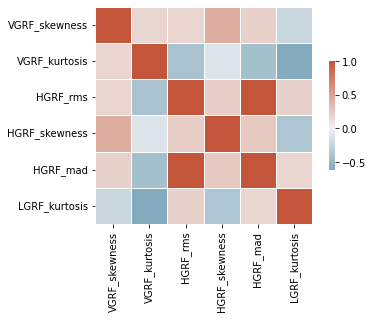

In [37]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data.corr(), cmap = cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Model Building

### Random Forest Classifier

In [47]:
X = data.drop(columns=['fatigue_level'])
y = data['fatigue_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
clf = RandomForestClassifier(max_depth=10) #random_state=42
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# using metrics module for accuracy calculation
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.375


### Naive Bayes

In [46]:
X = data.drop(columns=['fatigue_level'])
y = data['fatigue_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

# using metrics module for accuracy calculation
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.25


### Decision Tree

In [44]:
X = data.drop(columns=['fatigue_level'])
y = data['fatigue_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
dt = tree.DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# using metrics module for accuracy calculation
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.4166666666666667


## KNN

In [39]:
X = data.drop(columns=['fatigue_level'])
y = data['fatigue_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# using metrics module for accuracy calculation
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.4583333333333333


## lazypredict

In [41]:
from lazypredict.Supervised import LazyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lazyclassf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazyclassf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 20.76it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearDiscriminantAnalysis         0.58               0.57    None      0.61   
LogisticRegression                 0.58               0.56    None      0.60   
LinearSVC                          0.58               0.54    None      0.60   
RidgeClassifier                    0.58               0.54    None      0.58   
SGDClassifier                      0.58               0.54    None      0.59   
ExtraTreesClassifier               0.50               0.50    None      0.53   
CalibratedClassifierCV             0.46               0.49    None      0.47   
RidgeClassifierCV                  0.50               0.47    None      0.52   
NuSVC                              0.46               0.46    None      0.48   
RandomForestClassifier             0.46               0.46    None      0.47   
Perceptron                         0.46 

In [13]:
!pip install lazypredict

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
